### HELLO! Welcome to my community day demo! 
Emma Arrgio 2019 

In this notebook we are going to be looking at the Colac Otway shire animal registrations. Make sure you have the data downloaded in your directory to make sure it works ! 
Feel free to explore and play with things, if you come up with anything let me know! There is so much to do with this set and there is so much do play with, I only scratched the surface. 

Plus if you do any data science project let me know too

In [33]:
#its good practice to import everything you need at the beginning :) 

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [34]:
pet_data = pd.read_csv('Registrations_Master_Vic.csv')
#only interested in dogs 
pet_data['Animal_Type'] = pet_data['Animal_Type'].str.lower()
pet_data['Animal_Type'] = pet_data['Animal_Type'].str.replace(" ","")
dog_data = pet_data.loc[pet_data['Animal_Type'] == 'dog']
dog_data.shape

C:\Users\emmaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,6,7,11,13,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119247, 21)

By looking at this, you can see that there is are double ups and inconsistencies in the data. Wolfhound vs Wolf Hound. Labrador is the most popular. 

In [36]:
dog_data['Breed_Description_primary'].value_counts()

Labrador                                    5577
Jack Russell Terrier                        4090
Border Collie                               3609
Kelpie                                      2235
Maltese Terrier (Cross)                     2198
German Shepherd                             1998
Jack Russell                                1921
Golden Retriever                            1800
Maltese/Shih Tzu                            1697
Staffordshire Bull Terrier                  1599
Staffordshire Terrier                       1427
Staffordshire                               1266
Pomeranian                                  1226
Beagle                                      1205
Fox Terrier                                 1199
Maltese Terrier                             1173
Jack Russell Terrier (Cross)                1163
Chihuahua                                   1157
Maltese X                                   1106
Boxer                                       1075
Rottweiler          

In [37]:
#cleaning 
dog_data['Breed_Description_primary'] = dog_data['Breed_Description_primary'].str.lower()
dog_data['Breed_Description_primary'] = dog_data['Breed_Description_primary'].str.replace(" ","")


C:\Users\emmaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\emmaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Most popular dog name is Bella! 
Plust no other 'Data'

In [38]:
dog_data['Animal_Name'].str.lower().value_counts()

bella                                       1375
molly                                       1099
max                                         1006
charlie                                      974
ruby                                         753
jack                                         705
buddy                                        687
lucy                                         654
roxy                                         571
oscar                                        550
toby                                         501
coco                                         486
rosie                                        485
bonnie                                       469
maggie                                       448
millie                                       427
daisy                                        423
no name                                      383
missy                                        383
sam                                          354
chloe               

### Breeds

In [10]:
breed_counts = Counter(dog_data['Breed_Description_primary'])

In [39]:
#labrador is most popular once we have cleaned! 
dog_data['Breed_Description_primary'].value_counts()

labrador                          6638
bordercollie                      4915
jackrussellterrier                4454
kelpie                            3309
jackrussell                       2469
goldenretriever                   2266
germanshepherd                    2252
malteseterrier(cross)             2198
staffordshirebullterrier          2091
maltese/shihtzu                   1697
foxterrier                        1440
staffordshireterrier              1427
staffordshire                     1405
cockerspaniel                     1386
beagle                            1354
pomeranian                        1336
malteseterrier                    1273
chihuahua                         1268
boxer                             1246
rottweiler                        1195
jackrussellterrier(cross)         1163
maltesex                          1106
maltese/shihtzucross              1032
staffordshireterrier(cross)       1018
pug                               1015
malteseterriercross      

### Wordcloud 

In [12]:
#Uncomment if need to install wordcloud 
#!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


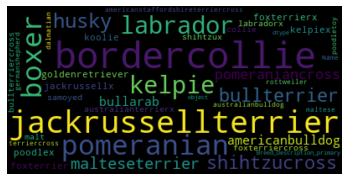

In [40]:
text = str(dog_data.Breed_Description_primary)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Wordcloud with a shape 
code looks different from the presenation as for some reason it stopped workign 

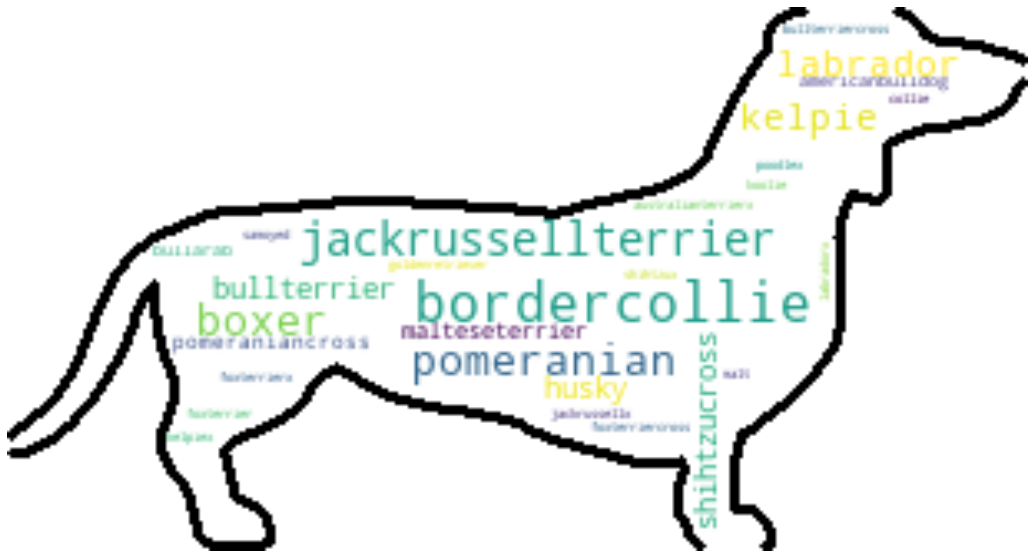

In [41]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val


dog_mask = np.array(Image.open("dog_mask.png"))
transformed_dog_mask = np.ndarray((dog_mask.shape[0],dog_mask.shape[1]), np.int32)

for i in range(len(dog_mask)):
    transformed_dog_mask[i] = list(map(transform_format, dog_mask[i]))    
    
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_dog_mask,
               contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate(text)

# store to file
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Microchipped 

In [44]:
microchip_count = dog_data['Microchipped'].str.lower().value_counts()
sum(microchip_count)

10733

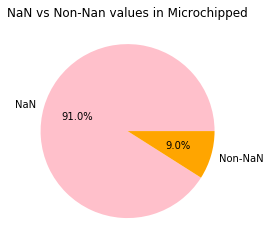

In [45]:

dog_data.Microchipped.value_counts()
not_micr = 119247 - sum(microchip_count)
not_nan = sum(microchip_count)

values = [not_micr, not_nan]
label = ['NaN', 'Non-NaN']
color = ['pink', 'orange']

plt.pie(values, labels=label, colors=color,autopct='%1.1f%%')
plt.title('NaN vs Non-Nan values in Microchipped')
plt.show()

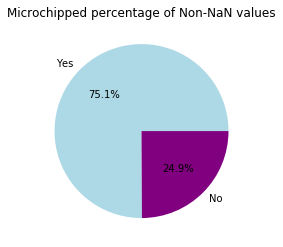

In [46]:
values = [microchip_count[0],microchip_count[1]]
label = ['Yes', 'No']
color = ['lightblue', 'purple']
#pie chart 
#microchip_count.values() 
plt.pie(values, labels=label, colors=color,autopct='%1.1f%%')
plt.title('Microchipped percentage of Non-NaN values')
plt.show()

## Registered Data 

In [10]:
registered_count = dog_data['Registered'].value_counts()
registered_count

Y    52208
N    24500
Name: Registered, dtype: int64

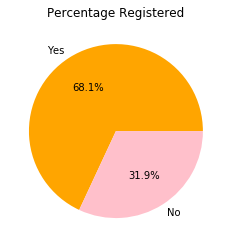

In [47]:
registered_count = dog_data['Registered'].value_counts()
values = [registered_count[0],registered_count[1]]
label = ['Yes', 'No']
color = ['orange', 'pink']
#pie chart  
plt.pie(values, labels=label, colors=color,autopct='%1.1f%%')
plt.title('Percentage Registered')
plt.show()


## Dogs by suburbs 

In [48]:
suburb_count  = Counter(dog_data['Suburb'])

In [49]:
reg_post = dog_data[['Postcode','Registered']]
count_reg= reg_post.pivot_table(index=['Postcode','Registered'], aggfunc='size')
print(count_reg)

Postcode  Registered
3350.0    N             8997
          Y             8193
3351.0    N               64
          Y               92
3352.0    N             1491
          Y             1681
3355.0    N             2305
          Y             1729
3356.0    N             2591
          Y             2192
3357.0    N              584
          Y              637
3358.0    N              150
          Y              271
3363.0    N               13
          Y                9
3364.0    N               47
          Y               46
dtype: int64


In [50]:
reg_sub = dog_data[['Suburb','Registered']]
sub_reg= reg_sub.pivot_table(index=['Suburb','Registered'], aggfunc='size')


In [51]:
#wanted to know if there were any like 20 labradors named Bella, there wasn't 
breed_names = dog_data[['Animal_Name','Breed_Description_primary']]
breed_name = breed_names.pivot_table(index=['Animal_Name','Breed_Description_primary'], aggfunc='size')


### Dog counts per suburb 

In [52]:

breed_suburb = dog_data[['Suburb','Breed_Description_primary']]
breed_suburb
dups_sub = breed_suburb.pivot_table(index=['Suburb','Breed_Description_primary'], aggfunc='size')
#print(dups_sub)



In [53]:
breed_post = dog_data[['Postcode','Breed_Description_primary']]
dups_post = breed_post.pivot_table(index=['Postcode','Breed_Description_primary'], aggfunc='size')
#print(dups_post)


#### Cleaning time! 

In [54]:

#these are the columns we want to keep, so standardize them 
dog_data['Registered'] = dog_data['Registered'].str.lower()
dog_data['Suburb'] = dog_data['Suburb'].str.lower()
dog_data['Breed_Description_primary'] = dog_data['Breed_Description_primary'].str.lower()
dog_data['Region'] = dog_data['Region'].str.lower()

#these are removing the nan values 
dropped_reg = dog_data.dropna(subset=['Registered','Age'])
#this is removing the columns we don't want 
model_data =  dropped_reg.drop(['State', 'Reference', 'Animal_Type',
                                'Breed_Description_secondary','Gender',
                                'Status_Description', 'Colour_secondary', 
                                'Animal Date of Birth','latitude', 'longitude', 'Microchipped', 
                                'Year', 'Animal_Name','Animal_Desexed','Colour_primary'], axis=1)

#DATA TRANSFORMATIONS! 
model_data.Breed_Description_primary= model_data.Breed_Description_primary.astype("category").cat.codes
model_data.Postcode= model_data.Postcode.astype("category").cat.codes
model_data.Registered=model_data.Registered.astype("category").cat.codes
model_data.Suburb=model_data.Suburb.astype("category").cat.codes
model_data.Region = model_data.Region.astype("category").cat.codes
model_data.Age = model_data.Age.astype(int)

C:\Users\emmaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\emmaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\emmaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [55]:
model_data.shape

(66148, 6)

### Model time! 

In [109]:
from sklearn.model_selection import train_test_split
data_tree = model_data[model_data.columns.difference(['Registered'])]
target = model_data['Registered']
X_train, X_test, y_train, y_test = train_test_split(data_tree, target, test_size=0.25, random_state=42)

In [110]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf_dog = clf.fit(X_train,y_train)
print('Score Decison Tree:', clf_dog.score(X_test, y_test))

Score Decison Tree: 0.6711011670798814


In [111]:
from sklearn import neighbors, linear_model
log = linear_model.LogisticRegression(solver='lbfgs', C=1e5)
log.fit(X_train, y_train)  
print('Score Logistic Regression:', log.score(X_test, y_test))

Score Logistic Regression: 0.7324786841627865


In [112]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Score Naive Bayes:', gnb.score(X_test, y_test))

Score Naive Bayes: 0.6966801717361069


In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

# Train
model.fit(X_train, y_train)
print('Score:', model.score(X_test, y_test))

Score: 0.7073834431880026


In [117]:
model_data.sample(n=20, random_state=32)

,Region,Breed_Description_primary,Suburb,Postcode,Age,Registered
62075,1,384,41,-1,3,1
37691,1,922,29,-1,5,1
84475,0,366,88,0,14,0
33011,1,884,14,-1,6,1
61647,1,366,1,-1,1,1
114212,0,597,106,4,10,1
55692,1,95,55,-1,1,0
37678,1,590,42,-1,5,1
55625,1,450,47,-1,5,1
64046,1,731,30,-1,13,0


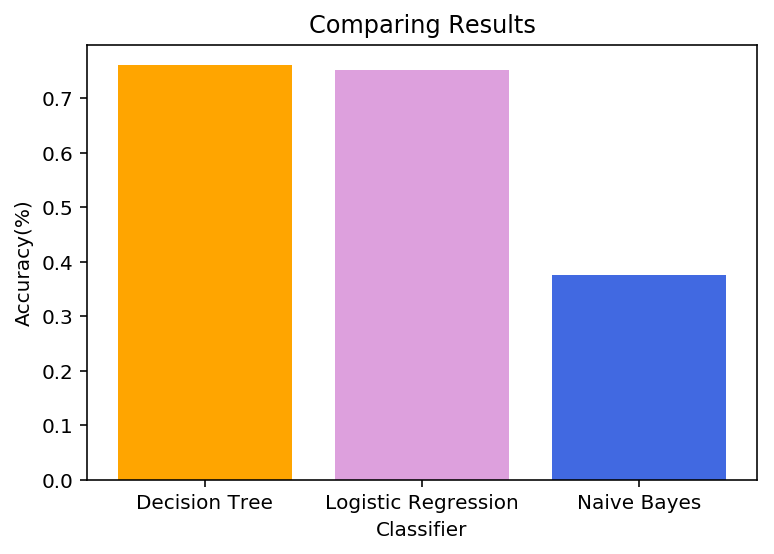

In [43]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [ 0.7598685925848673, 0.7508473692444073, 0.375293320123064]
bars = ('Decision Tree', 'Logistic Regression', 'Naive Bayes')
cols = ('orange', 'plum', 'royalblue')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = cols)
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel('Accuracy(%)')
plt.xlabel('Classifier')
plt.title("Comparing Results")
# Show graphic
plt.show()
